In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Data/train.csv")
data.head()
  

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Data Exploration                

In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Fredrick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


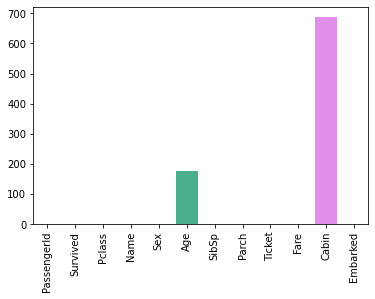

In [8]:
nulls = data.isnull().sum()
g = sns.barplot(nulls.index, nulls)
g.set_xticklabels(nulls.index, rotation=90)
plt.show()

<AxesSubplot:>

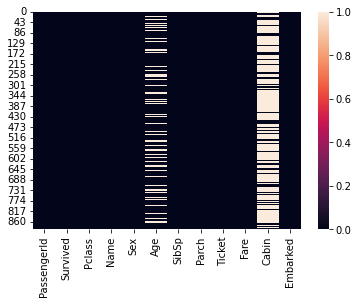

In [9]:
sns.heatmap(data.isnull())

C:\Users\Fredrick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

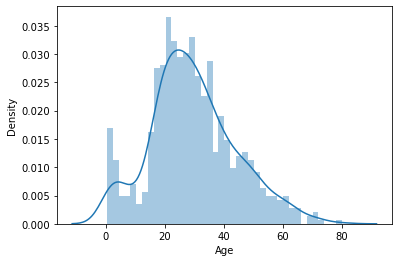

In [10]:
sns.distplot(data['Age'], bins=40)

In [11]:
data['Age'].median()
data['Age'].fillna(data['Age'].median(), inplace=True)

In [12]:
data.isnull().sum()/data.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

C:\Users\Fredrick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

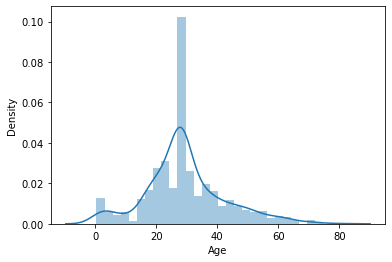

In [13]:
sns.distplot(data['Age'])

In [14]:
data.drop('Cabin', axis=1, inplace= True)


In [15]:
data.isnull().sum()/data.shape[0] * 100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [17]:
data.drop('Ticket', axis=1, inplace= True)
data.isnull().sum()/data.shape[0] * 100

KeyError: "['Ticket'] not found in axis"

In [18]:
data.drop('PassengerId', axis=1, inplace= True)
data.isnull().sum()/data.shape[0] * 100

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64

In [19]:
#Add  SibSP and Parch plus 1 for self - the person on the boat and see the answer
data['SibSp'] + data['Parch'] + 1
data.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  
0    male  22.0      1      0   7.2500        S  
1  female  38.0      1      0  71.2833        C  
2  female  26.0      0      0   7.9250        S  
3  female  35.0      1      0  53.1000        S  
4    male  35.0      0      0   8.0500        S

In [20]:
#Add this to the dataframe
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  
0    male  22.0      1      0   7.2500        S           2  
1  female  38.0      1      0  71.2833        C           2  
2  female  26.0      0      0   7.9250        S           1  
3  female  35.0      1      0  53.1000        S           2  
4    male  35.0      0      0   8.0500        S           1

In [21]:
#Groupby of family size and get mean
print(data[['FamilySize', 'Survived']].groupby('FamilySize').mean())


            Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000


In [22]:
#Regular expression for extracting title from name
import re
def get_title(name):
    pattern = r'([A-Za-z]+)\.'
    result = re.search(pattern, name)
    #if title exists, extract and return it
    if result:
        return result.group(1)
    return ''

In [23]:
#Create array of names
data['Title'] = data["Name"].apply(get_title)
data.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  FamilySize Title  
0    male  22.0      1      0   7.2500        S           2    Mr  
1  female  38.0      1      0  71.2833        C           2   Mrs  
2  female  26.0      0      0   7.9250        S           1  Miss  
3  female  35.0      1      0  53.1000        S           2   Mrs  
4    male  35.0      0      0   8.0500        S           1    Mr

In [24]:
#Check all values of title
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [25]:
#Merge Titles
title_Dict = {
    'Countess' : 'Royal',
    'Lady': 'Royal',
    'Jonkheer' : 'Royal',
    'Sir': 'Royal',
    'Major': 'Army',
    'Col': 'Army',
    'Capt' : 'Capt',
    'Mlle' : 'Miss',
    'Ms' : 'Miss',
    'Mme' : 'Mrs', 
    'Mr' : 'Mr',
    'Miss' : 'Miss',
    'Mrs' : 'Mrs',
    'Master' : 'Master',
    'Dr': 'Dr',
    'Rev': 'Rev',
    'Don': 'Don'
}

In [26]:
#Define a map
def title_map(x):
    return title_Dict[x]

In [27]:
#Apply to dataset
data['Title'] = data['Title'].apply(title_map)

In [28]:
#Check all values of title
data['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Dr          7
Rev         6
Army        4
Royal       4
Don         1
Capt        1
Name: Title, dtype: int64

In [29]:
#Check mean values survived by title
print(data[['Title', 'Survived']].groupby('Title').mean())

        Survived
Title           
Army    0.500000
Capt    0.000000
Don     0.000000
Dr      0.428571
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rev     0.000000
Royal   0.750000


In [30]:
#Store the above pivot table into a variable
pvt = data[['Title', 'Survived']].groupby('Title').mean()

In [31]:
#Print the table
pvt

Survived
Title           
Army    0.500000
Capt    0.000000
Don     0.000000
Dr      0.428571
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rev     0.000000
Royal   0.750000

In [32]:
#Convert table into dataframe
df = pvt.reset_index()

In [33]:
#Print Dataframe
df

Title  Survived
0    Army  0.500000
1    Capt  0.000000
2     Don  0.000000
3      Dr  0.428571
4  Master  0.575000
5    Miss  0.702703
6      Mr  0.156673
7     Mrs  0.793651
8     Rev  0.000000
9   Royal  0.750000

<AxesSubplot:xlabel='Title'>

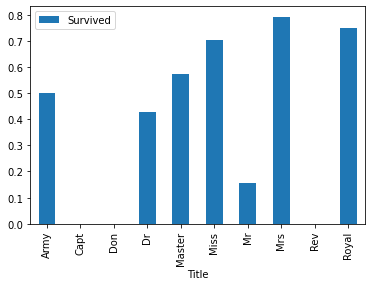

In [34]:
#Create a bar plot
df.plot(kind='bar', x='Title')


In [35]:
data.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  FamilySize Title  
0    male  22.0      1      0   7.2500        S           2    Mr  
1  female  38.0      1      0  71.2833        C           2   Mrs  
2  female  26.0      0      0   7.9250        S           1  Miss  
3  female  35.0      1      0  53.1000        S           2   Mrs  
4    male  35.0      0      0   8.0500        S           1    Mr

In [36]:
#Find out if we only have two unique values for Sex
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
#Create two columns for sex
data = pd.get_dummies(data, columns=['Sex'])

In [38]:
#Create two columns for Embarked
data = pd.get_dummies(data, columns=['Embarked'])

In [39]:
#View DataFrame
data

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

      Age  SibSp  Parch     Fare  FamilySize Title  Sex_female  Sex_male  \
0    22.0      1      0   7.2500           2    Mr           0         1   
1    38.0      1      0  71.2833           2   Mrs           1         0   
2    26.0      0      0   7.9250           1  Miss           1         0   
3    35.0      1      0  53.1000           2   Mrs           1         0   
4    35.0      0      0   8.0500           1    Mr           0         1   
..    ...    ...    ...      ...         ...   ...         ...       ...   
886  27.0      0      0  13.0000           1   Rev           0         1   
887  19.0      0      0  30.0000           1  Miss           1         0   
888  28.0      1      2  23.4500           4  Miss           1         0   
889  26.0      0      0  30.0000           1    Mr           0         1   
890  32.0      0      0   7.7500           1    Mr           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2             0           0           1  
3             0           0           1  
4             0           0           1  
..          ...         ...         ...  
886           0           0           1  
887           0           0           1  
888           0           0           1  
889           1           0           0  
890           0           1           0  

[891 rows x 14 columns]

In [40]:
#Drop Sex_female'
data.drop('Sex_female', axis=1, inplace=True)

In [41]:
#Drop Embarked_S
data.drop('Embarked_S', axis=1, inplace=True)

In [42]:
#View to confirm
data

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

      Age  SibSp  Parch     Fare  FamilySize Title  Sex_male  Embarked_C  \
0    22.0      1      0   7.2500           2    Mr         1           0   
1    38.0      1      0  71.2833           2   Mrs         0           1   
2    26.0      0      0   7.9250           1  Miss         0           0   
3    35.0      1      0  53.1000           2   Mrs         0           0   
4    35.0      0      0   8.0500           1    Mr         1           0   
..    ...    ...    ...      ...         ...   ...       ...         ...   
886  27.0      0      0  13.0000           1   Rev         1           0   
887  19.0      0      0  30.0000           1  Miss         0           0   
888  28.0      1      2  23.4500           4  Miss         0           0   
889  26.0      0      0  30.0000           1    Mr         1           1   
890  32.0      0      0   7.7500           1    Mr         1           0   

     Embarked_Q  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
886           0  
887           0  
888           0  
889           0  
890           1  

[891 rows x 12 columns]

In [43]:
#Import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [44]:
#Transform Title column
data[['Title']] = enc.fit_transform(data[['Title']])


In [45]:
#Show DataFrame to confirm transformation
data

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

      Age  SibSp  Parch     Fare  FamilySize  Title  Sex_male  Embarked_C  \
0    22.0      1      0   7.2500           2    6.0         1           0   
1    38.0      1      0  71.2833           2    7.0         0           1   
2    26.0      0      0   7.9250           1    5.0         0           0   
3    35.0      1      0  53.1000           2    7.0         0           0   
4    35.0      0      0   8.0500           1    6.0         1           0   
..    ...    ...    ...      ...         ...    ...       ...         ...   
886  27.0      0      0  13.0000           1    8.0         1           0   
887  19.0      0      0  30.0000           1    5.0         0           0   
888  28.0      1      2  23.4500           4    5.0         0           0   
889  26.0      0      0  30.0000           1    6.0         1           1   
890  32.0      0      0   7.7500           1    6.0         1           0   

     Embarked_Q  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
886           0  
887           0  
888           0  
889           0  
890           1  

[891 rows x 12 columns]

In [46]:
#Confirm the transformations
data['Title'].unique()

array([6., 7., 5., 4., 2., 8., 3., 0., 9., 1.])

In [47]:
#Drop Name
data.drop('Name', axis=1, inplace=True)

In [48]:
#Confirm Name has been dropped
data.head()

Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  Title  Sex_male  \
0         0       3  22.0      1      0   7.2500           2    6.0         1   
1         1       1  38.0      1      0  71.2833           2    7.0         0   
2         1       3  26.0      0      0   7.9250           1    5.0         0   
3         1       1  35.0      1      0  53.1000           2    7.0         0   
4         0       3  35.0      0      0   8.0500           1    6.0         1   

   Embarked_C  Embarked_Q  
0           0           0  
1           1           0  
2           0           0  
3           0           0  
4           0           0

In [49]:
#Confirm all data is numeric
data.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
FamilySize      int64
Title         float64
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
dtype: object

# Data Visualization

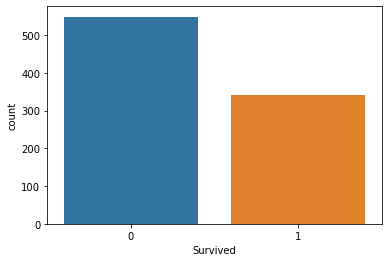

In [50]:
#Create a countplot of Survived
ax = sns.countplot(x="Survived", data=data)

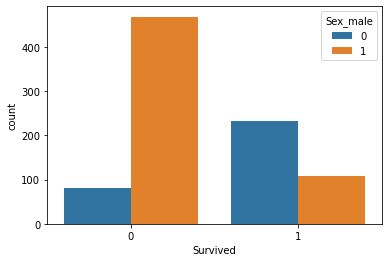

In [51]:
#Countplot of Survived with split by Sex
ax = sns.countplot(x="Survived", hue='Sex_male',  data=data)

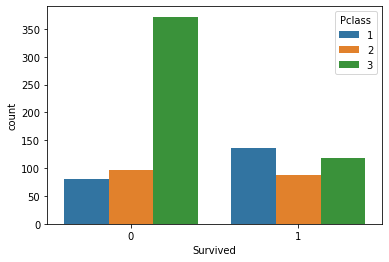

In [52]:
#Countplot of Survived with split by Passenger class
ax = sns.countplot(x="Survived", hue='Pclass',  data=data)

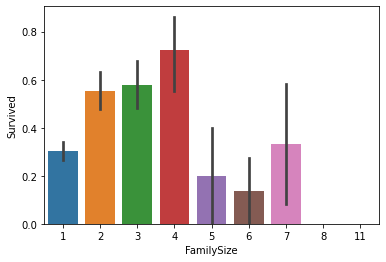

In [53]:
#Countplot of Survived mean and family size
ax = sns.barplot(data = data, x="FamilySize", y = "Survived")

<AxesSubplot:xlabel='Age', ylabel='Density'>

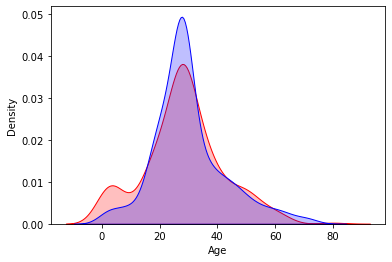

In [54]:
#Create two KDE plots for Age each with survived and not survived
sns.kdeplot(data.loc[(data['Survived']==1),'Age'], color='r', shade=True, label='Survived')
sns.kdeplot(data.loc[(data['Survived']==0),'Age'], color='b', shade=True, label='Not Survived')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

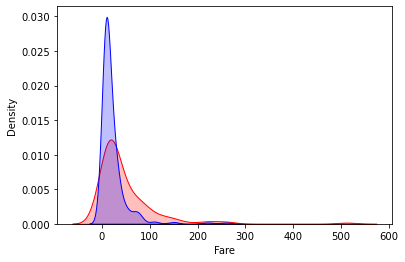

In [55]:
#Create two KDE plots for Fare each with survived and not survived
sns.kdeplot(data.loc[(data['Survived']==1),'Fare'], color='r', shade=True, label='Survived')
sns.kdeplot(data.loc[(data['Survived']==0),'Fare'], color='b', shade=True, label='Not Survived')

In [56]:
#Split Data into X and y sets
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [57]:
#Now split the data into training and testing sets. Ratio 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [96]:
#Create dictionary to store scores
accuracy_scores = {}

In [59]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [84]:
#First initlaize the classifiers
svc = SVC()
logreg = LogisticRegression(solver='liblinear')
dectree = DecisionTreeClassifier()
randforest = RandomForestClassifier()


In [85]:
#Create a list of classifiers
classifiers = [svc, logreg, dectree, randforest]

In [86]:
#Print out the list
classifiers

[SVC(),
 LogisticRegression(solver='liblinear'),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [97]:
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores[classifier] = accuracy_score(y_pred, y_test)

In [98]:
list(accuracy_scores.items())

[(SVC(), 0.6492537313432836),
 (LogisticRegression(solver='liblinear'), 0.7723880597014925),
 (DecisionTreeClassifier(), 0.7425373134328358),
 (RandomForestClassifier(), 0.7611940298507462)]

In [99]:
#Create a Framce from accuracy scores dictionary
df_score = pd.DataFrame(accuracy_scores.items(), columns = ['Classifier', 'Accuracy'])

In [100]:
df_score

Classifier  Accuracy
0                                              SVC()  0.649254
1             LogisticRegression(solver='liblinear')  0.772388
2                           DecisionTreeClassifier()  0.742537
3  (DecisionTreeClassifier(max_features='auto', r...  0.761194

In [101]:
#Check Data types
df_score.dtypes

Classifier     object
Accuracy      float64
dtype: object

In [104]:
sns.barplot(data = df_score, x='Accuracy', y ='Classifier')

TypeError: '<' not supported between instances of 'LogisticRegression' and 'SVC'